In [1]:
import geopandas as gpd
import gdal
import contextily as ctx
import matplotlib.pyplot as plt

In [12]:
# Load the shapefiles
gdf_dins = gpd.read_file(r'Shapefiles\CAL_FIRE_Damage_Inspection_(DINS)_Data.shp')
gdf_perim = gpd.read_file('Shapefiles/California_Fire_Perimeters_(1950+).shp')


c:\Users\tfregoso\AppData\Local\anaconda3\envs\boot_env\Lib\site-packages\pyogrio\raw.py:196: RuntimeWarning: Shapefiles/California_Fire_Perimeters_(1950+).shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


In [13]:
print("\nCAL FIRE Damage Inspection (DINS) Data:")
print(gdf_dins.info())
print("\nCalifornia Fire Perimeters (1950+):")
print(gdf_perim.info())


CAL FIRE Damage Inspection (DINS) Data:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 92113 entries, 0 to 92112
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OBJECTID    92113 non-null  int32         
 1   DAMAGE      92113 non-null  object        
 2   STREETNUMB  87693 non-null  float64       
 3   STREETNAME  87780 non-null  object        
 4   STREETTYPE  85408 non-null  object        
 5   STREETSUFF  39368 non-null  object        
 6   CITY        89220 non-null  object        
 7   STATE       92106 non-null  object        
 8   ZIPCODE     39312 non-null  float64       
 9   CALFIREUNI  92113 non-null  object        
 10  COUNTY      92083 non-null  object        
 11  COMMUNITY   52017 non-null  object        
 12  BATTALION   4467 non-null   object        
 13  INCIDENTNA  92113 non-null  object        
 14  INCIDENTNU  92113 non-null  object        
 15  INCIDENTST  92113 non

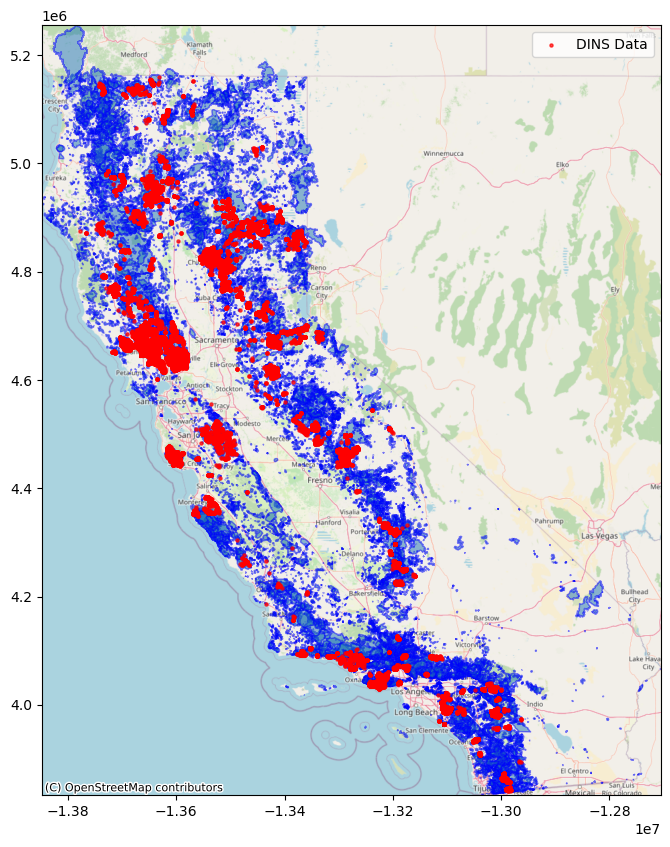

In [15]:
# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the California Fire Perimeters (polygon data)
gdf_perim.plot(ax=ax, alpha=0.5, edgecolor='blue')

# Plot the CAL FIRE DINS Data (point data)
gdf_dins.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.7, label='DINS Data')

# Ensure the extent is set before adding the basemap
ax.set_xlim(gdf_perim.total_bounds[0], gdf_perim.total_bounds[2])
ax.set_ylim(gdf_perim.total_bounds[1], gdf_perim.total_bounds[3])

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf_perim.crs)

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [16]:
# Filtering the California Fire Perimeters for the decades 2000 and 2020
gdf_perim_filtered = gdf_perim[gdf_perim['DECADES'].isin([2000, 2020])]

# Filtering the CAL FIRE DINS Data for incidents on or after 01/01/2000
gdf_dins_filtered = gdf_dins[gdf_dins['INCIDENTST'] >= '2000-01-01']


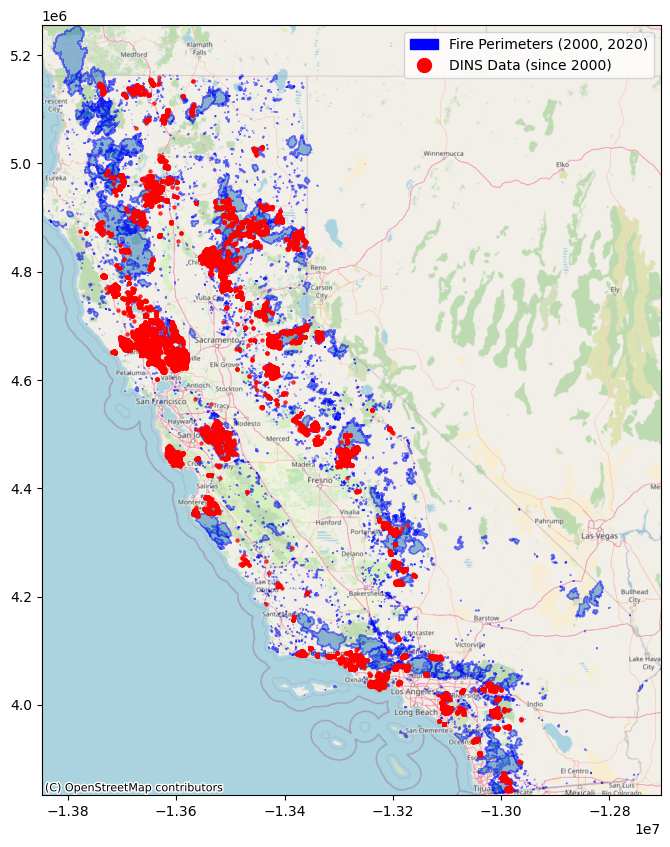

In [20]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the filtered California Fire Perimeters (polygon data)
gdf_perim_filtered.plot(ax=ax, alpha=0.5, edgecolor='blue', label='Fire Perimeters (2000, 2020)')

# Plot the filtered CAL FIRE DINS Data (point data)
gdf_dins_filtered.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.7, label='DINS Data (since 2000)')

# Ensure the extent is set before adding the basemap
ax.set_xlim(gdf_perim.total_bounds[0], gdf_perim.total_bounds[2])
ax.set_ylim(gdf_perim.total_bounds[1], gdf_perim.total_bounds[3])

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf_perim.crs)

# Create custom legend handles
fire_perimeters_patch = mpatches.Patch(color='blue', label='Fire Perimeters (2000, 2020)')
dins_data_marker = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                                 markersize=10, label='DINS Data (since 2000)')

# Add the custom legend
ax.legend(handles=[fire_perimeters_patch, dins_data_marker])

# Show the plot
plt.show()

In [21]:
# Export the filtered California Fire Perimeters to a GeoPackage
gdf_perim_filtered.to_file('Shapefiles/California_Fire_Perimeters_2000_2020.gpkg', layer='fire_perimeters', driver="GPKG")

# Export the filtered CAL FIRE DINS Data to a GeoPackage
gdf_dins_filtered.to_file('Shapefiles/CAL_FIRE_DINS_Since_2000.gpkg', layer='dins_data', driver="GPKG")


In [22]:
# Select the specific columns from the filtered data
gdf_perim_filtered_subset = gdf_perim_filtered[
    ['YEAR_', 'STATE', 'AGENCY', 'FIRE_NAME', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'COMPLEX_NA', 'IRWINID', 'FIRE_NUM', 'DECADES', 'geometry']
]
# Export the filtered subset of California Fire Perimeters to a GeoPackage
gdf_perim_filtered_subset.to_file('Shapefiles/California_Fire_Perimeters_2000_2020_Subset.gpkg', layer='fire_perimeters_subset', driver="GPKG")


In [23]:
# Select the specific columns from the filtered DINS data
gdf_dins_filtered_subset = gdf_dins_filtered[
    ['OBJECTID', 'DAMAGE', 'CITY', 'ZIPCODE', 'COUNTY', 'INCIDENTNA', 'INCIDENTST', 
     'HAZARDTYPE', 'STRUCTURET', 'STRUCTUREC', 'FIRENAME', 'YEARBUILT', 
     'SITEADDRES', 'Latitude', 'Longitude', 'geometry']
]

# Export the filtered subset of CAL FIRE DINS Data to a GeoPackage
gdf_dins_filtered_subset.to_file('Shapefiles/CAL_FIRE_DINS_Since_2000_Subset.gpkg', layer='dins_data_subset', driver="GPKG")


In [24]:
import geopandas as gpd

# Load the California county boundaries from the GeoPackage
gdf_counties = gpd.read_file('California_County_Boundaries.gpkg')


In [26]:
# Perform a spatial join between the fire perimeters and the county boundaries
gdf_perim_with_counties = gpd.sjoin(gdf_perim_filtered_subset, gdf_counties, how="left", predicate="intersects")

# The resulting GeoDataFrame will have new columns from the county dataset, including county names


In [27]:
gdf_perim_with_counties

,YEAR_,STATE,AGENCY,FIRE_NAME,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,COMPLEX_NA,IRWINID,...,DECADES,geometry,index_right,COUNTY_NAME,COUNTY_ABBREV,COUNTY_NUM,COUNTY_CODE,COUNTY_FIPS,ISLAND,GlobalID
0,2023,CA,CDF,WHITWORTH,2023/06/17,2023/06/17,5,None,None,{7985848C-0AC2-4BA4-8F0E-29F778652E61},...,2020,"POLYGON ((-13682443 5091132.739, -13682445.825...",46,Siskiyou,SIS,47,47,093,None,{79363538-FD2D-4CCD-8370-D3D130C54777}
1,2023,CA,LRA,KAISER,2023/06/02,2023/06/02,5,None,None,{43EBCC88-B3AC-48EB-8EF5-417FE0939CCF},...,2020,"POLYGON ((-13576727.142 4841226.161, -13576726...",3,Butte,BUT,4,04,007,None,{44FBA680-AECC-4E04-A499-29D69AFFBD4A}
2,2023,CA,CDF,JACKSON,2023/07/01,2023/07/02,2,None,None,{B64E1355-BF1D-441A-95D0-BC1FBB93483B},...,2020,"POLYGON ((-13459243 4621236, -13458968 4621453...",2,Amador,AMA,3,03,005,None,{4F45B3A6-BE10-461C-8945-6B2AAA7119F6}
3,2023,CA,CDF,CARBON,2023/07/11,2023/07/11,9,None,None,{CB41DB0A-E4B1-489D-A4EA-738F2CD6DB3B},...,2020,"POLYGON ((-13468077 4642260, -13467975 4642332...",2,Amador,AMA,3,03,005,None,{4F45B3A6-BE10-461C-8945-6B2AAA7119F6}
4,2023,CA,CDF,LIBERTY,2023/07/11,2023/07/12,14,None,None,{F83F70A4-07A7-40B8-BD51-10CCC1C30D63},...,2020,"POLYGON ((-13468418 4614853, -13468428 4614801...",2,Amador,AMA,3,03,005,None,{4F45B3A6-BE10-461C-8945-6B2AAA7119F6}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7812,2000,CA,NPS,PT BONITA,2000/10/22,2000/11/01,8,None,None,None,...,2000,"POLYGON ((-13639835.818 4554839.017, -13639790...",20,Marin,MRN,21,21,041,None,{F2604FED-7C76-4BCB-A5E0-667D6D3405B5}
7813,2000,CA,NPS,CONIFER,2000/01/01,2000/01/20,18,None,None,None,...,2000,"POLYGON ((-13217914.006 4362432.814, -13217947...",53,Tulare,TUL,54,54,107,None,{709BE848-8AAC-4CD3-BF13-8B982EDE6775}
7814,2000,CA,NPS,HAPPY,2000/07/22,2000/08/05,5,None,None,None,...,2000,"POLYGON ((-13036219.138 4310454.498, -13036219...",13,Inyo,INY,14,14,027,None,{24BDC0FF-4379-4055-A132-96A222AFA5F5}
7815,2000,CA,CCO,CALABASAS,2000/06/11,2000/06/12,14,None,None,None,...,2000,"POLYGON ((-13211780.748 4055440.009, -13211724...",55,Ventura,VEN,56,56,111,None,{DFDE8E6B-742D-48C4-A4A0-4952E37D938B}


Fire incidence counts by county

In [29]:
# Group by the county (assuming the county name or identifier is in a column named 'county_name')
# Replace 'county_name' with the actual column name that contains the county names
fire_perim_count_by_county = gdf_perim_with_counties.groupby('COUNTY_NAME').size().reset_index(name='fire_perim_count')

# If the county column has a different name, replace 'county_name' with that column's name

# Display the table
print(fire_perim_count_by_county)

# Export to a CSV file
#fire_perim_count_by_county.to_csv('D:/BootCamp/FireProject/fire_perim_count_by_county.csv', index=False)


        COUNTY_NAME  fire_perim_count
0           Alameda                31
1            Alpine                14
2            Amador                29
3             Butte                85
4         Calaveras                65
5            Colusa                21
6      Contra Costa                24
7         Del Norte                24
8         El Dorado                76
9            Fresno               150
10            Glenn                35
11         Humboldt                86
12         Imperial                15
13             Inyo                54
14             Kern               325
15            Kings                 7
16             Lake                71
17           Lassen               112
18      Los Angeles               296
19           Madera                61
20            Marin                23
21         Mariposa                91
22        Mendocino               116
23           Merced                42
24            Modoc               103
25          

Counties that had no fire activity from 2000 to today

In [32]:
import pandas as pd

# Perform a left join to include all counties, even those with no fires
counties_with_fire_counts = pd.merge(gdf_counties[['COUNTY_NAME']], fire_perim_count_by_county, on='COUNTY_NAME', how='left')

# Fill NaN values with 0 (indicating no fires)
counties_with_fire_counts['fire_perim_count'] = counties_with_fire_counts['fire_perim_count'].fillna(0)

# Filter to get counties with no fires
counties_with_no_fires = counties_with_fire_counts[counties_with_fire_counts['fire_perim_count'] == 0]

# Display or export the result
print(counties_with_no_fires)

# Export to CSV if needed
#counties_with_no_fires.to_csv('D:/BootCamp/FireProject/counties_with_no_fires.csv', index=False)

      COUNTY_NAME  fire_perim_count
37  San Francisco               0.0


In [33]:
# Group by county and year, and count the number of fire perimeters
fires_by_county_year = gdf_perim_with_counties.groupby(['COUNTY_NAME', 'YEAR_']).size().reset_index(name='fire_perim_count')

# Display the result
print(fires_by_county_year)

# Optionally, create a pivot table for easier visualization
fires_by_county_year_pivot = fires_by_county_year.pivot(index='COUNTY_NAME', columns='YEAR_', values='fire_perim_count').fillna(0)

# Display the pivot table
print(fires_by_county_year_pivot)

# Export the pivot table to a CSV file if needed
fires_by_county_year_pivot.to_csv('D:/BootCamp/FireProject/fires_by_county_year.csv')


    COUNTY_NAME  YEAR_  fire_perim_count
0       Alameda   2000                 1
1       Alameda   2001                 1
2       Alameda   2002                 4
3       Alameda   2003                 4
4       Alameda   2005                10
..          ...    ...               ...
653        Yuba   2009                 4
654        Yuba   2020                10
655        Yuba   2021                15
656        Yuba   2022                 8
657        Yuba   2023                 6

[658 rows x 3 columns]
YEAR_            2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
COUNTY_NAME                                                                   
Alameda           1.0   1.0   4.0   4.0   0.0  10.0   1.0   0.0   0.0   0.0   
Alpine            2.0   0.0   1.0   1.0   1.0   0.0   0.0   1.0   1.0   0.0   
Amador            0.0   3.0   5.0   2.0   3.0   1.0   2.0   0.0   1.0   0.0   
Butte             3.0   4.0   3.0   5.0   1.0   0.0   3.0   3.0  17.0   2.0   
Calaveras 

# Heat Map of fire, county by county

Aggregate the Total Count of Fires by County


In [35]:
# Aggregate the total count of fires by county
fires_by_county = gdf_perim_with_counties.groupby('COUNTY_NAME').size().reset_index(name='total_fires')

# Merge this data back with the county boundaries GeoDataFrame to ensure we have a geometry for each county
gdf_counties_fires = gdf_counties.merge(fires_by_county, on='COUNTY_NAME', how='left')

# Fill NaN values with 0 for counties with no fires
gdf_counties_fires['total_fires'] = gdf_counties_fires['total_fires'].fillna(0)


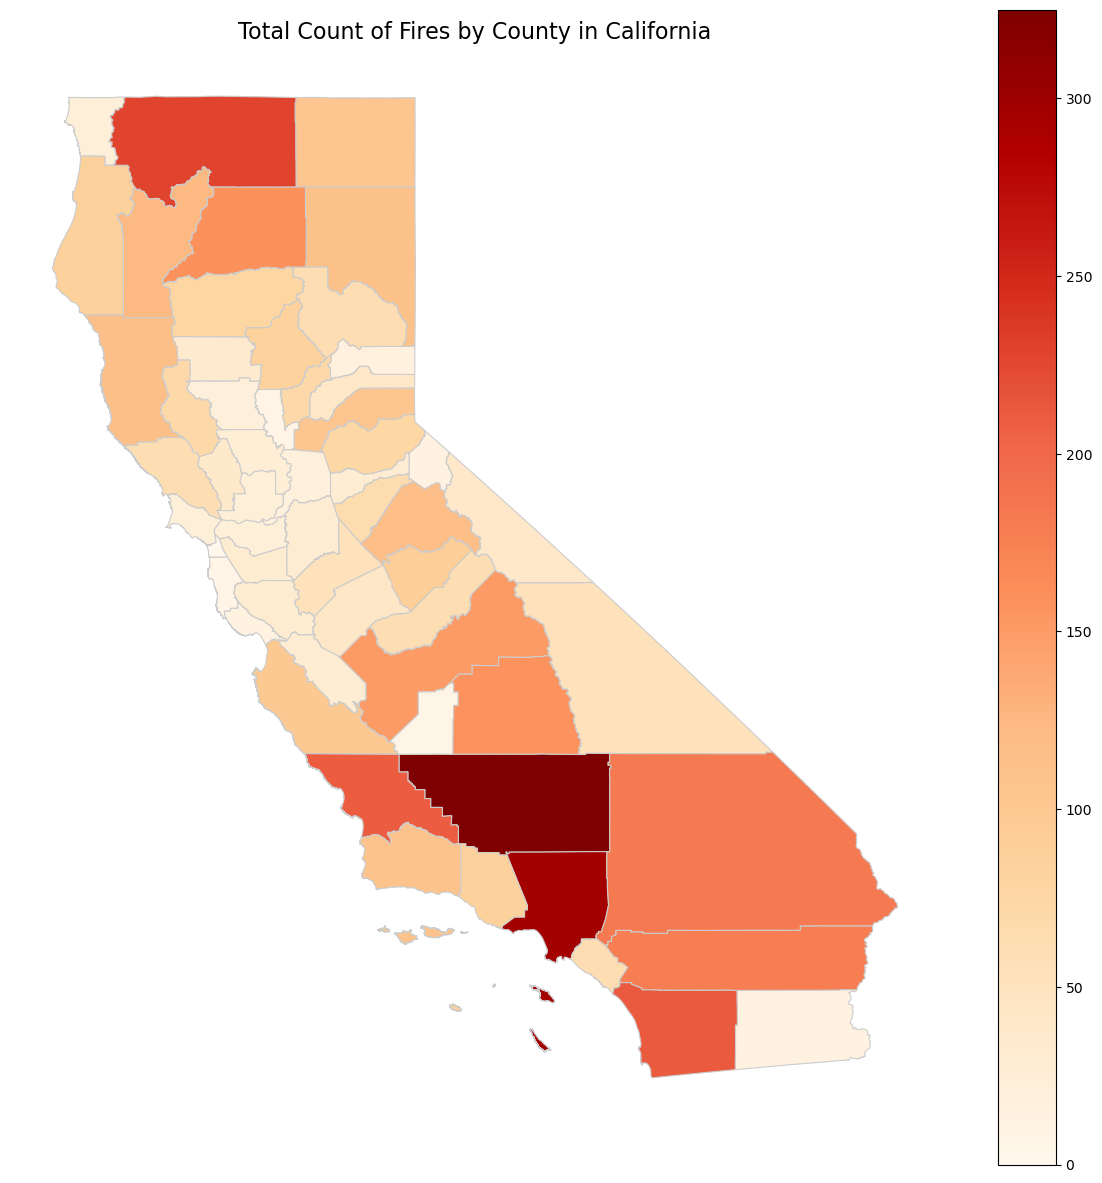

In [36]:
# Plot Map

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Create the heat map by plotting the counties and coloring by the 'total_fires' column
gdf_counties_fires.plot(column='total_fires', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title
ax.set_title('Total Count of Fires by County in California', fontsize=16)

# Remove the axis for a cleaner look
ax.set_axis_off()

# Show the plot
plt.show()
